C:\Users\cobaltixtab\Anaconda3\lib\site-packages\numpy\core\numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


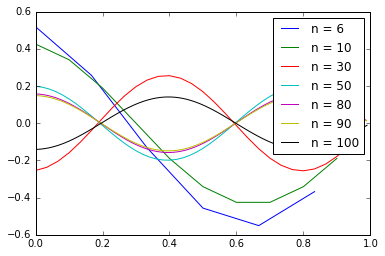

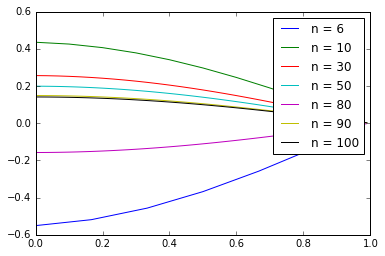

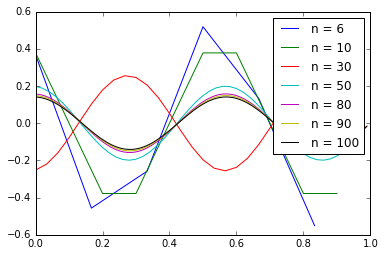

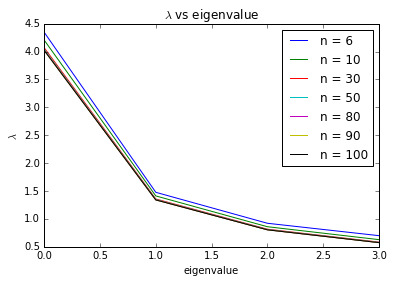

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
    
import numpy as np
import scipy.sparse.linalg as ssl
    
#    n = 20# number of steps
nlist = [6, 10,30,50,80,90,100]
    
for n in nlist:
    c = 1 #spd of light
    size = 1   # domain size
    
    dx = size/n  #step size
    getev = 4 # eigenvalues desired
    x = np.arange(0,size,dx)
    
    iden = np.ones((n,n)) #identity matrix
    F = (1/dx)*(np.triu(iden)-2*np.diag(np.diag(iden))-np.triu(iden,2))
    B = (1/dx)*(-np.tril(iden)+2*np.diag(np.diag(iden))+np.tril(iden,-2))
    bf = -np.matmul(B,F)
    
    
    #%matplotlib inline
    #import matplotlib.pyplot as plt
    #import scipy as sp 
    #plt.spy(sp.sparse.csr_matrix(bf)) # to visualize matrix
    #plt.show()
    
    kt = 2*np.pi
    k2, V = ssl.eigs(bf, k=getev, M=None, sigma=kt**2) 
    
    k = np.sort(np.sqrt(k2))
    
    #print(np.linalg.eigvals(bf-kt**2))
    #print(np.real(k))
    
    lam = 2*np.pi*c/np.real(k)
    #qualf = np.real(k)/(2*np.imag(k)) #is infinite?
    
    plt.hold(True)
    fignum = 0
    for i in range(1, getev):
        fignum = fignum + 1
        plt.figure(fignum)
        plt.plot(x, V[:,i], label="n = " + str(n))
        plt.legend()
        
        
    plt.figure(fignum+1)
    plt.xlabel("eigenvalue")
    plt.ylabel("$\lambda$")
    plt.title("$\lambda$ vs eigenvalue")
    plt.plot(lam, label="n = " + str(n))
    plt.legend()
